In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris)

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [ ]:
a = iris.data
b = iris.target
a.shape, b.shape

((150, 4), (150,))

In [ ]:
# Splitting the datasets into training and testing datasets
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=88)
print("Training sets size: ", a_train.shape, b_train.shape)
print("Testing sets size: ", a_test.shape, b_test.shape)

Training sets size:  (120, 4) (120,)
Testing sets size:  (30, 4) (30,)


In [ ]:
# Build log reg model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)

In [ ]:
# Train the model on training data
lr.fit(a_train, b_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Finding predicted values using the testing dataset
b_pred = lr.predict(a_test)
b_pred.shape, b_test.shape

((30,), (30,))

In [ ]:
# Performance evaluation
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score , roc_auc_score, confusion_matrix
print("Model accuracy score: ", accuracy_score(b_pred, b_test))
print("Model precision score: ", precision_score(b_pred, b_test, average='weighted'))
print("Model f1 score: ", f1_score(b_pred, b_test,  average='weighted'))
print("Model recall score: ", recall_score(b_pred, b_test,  average='weighted'))
# print("Model roc-auc score:  ", roc_auc_score(b_pred, b_test))   # Not used for multiclass classification
print("Model confusion matrix: ", confusion_matrix(b_pred, b_test))

Model accuracy score:  1.0
Model precision score:  1.0
Model f1 score:  1.0
Model recall score:  1.0
Model confusion matrix:  [[ 9  0  0]
 [ 0  9  0]
 [ 0  0 12]]


In [ ]:
# Lets predict 0:5
lr.predict(iris.data[41:49])

array([0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
iris.target[41:49]

array([0, 0, 0, 0, 0, 0, 0, 0])

Text(33.22222222222222, 0.5, 'Actual')

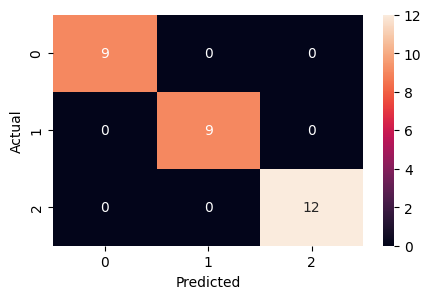

In [ ]:
# To find where the model made mistakes
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(confusion_matrix(b_pred, b_test), annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")